# 想想看，你能做那些改進來提升正確率 (accuracy) ？
1. 修改epoch和batch size
2. 修改layer數
3. 修改optimizer 
4. 修改loss function
5. 修改activate function
6. 分割Validation Set
7. 調整learning rate
8. 修改unit數目
9. 正規化數據
10. 增加data數量
11. 改變問題本身ex binary --> category

## 我修改的部分
1. epochs=16,batch_size=128
2. optimizer = 'adam'
3. dense unit 512 --> 10
4. validation_split=0.2

## <div style='color:red'>我的模型acc在train已達100% </div>

## 程式解釋
 
1. 載入mnist資料集，含(train_images,train_labels)和(test_images,test_labels)
2. 用兩個Dense層架構(network.add())了一個神經網路
3. 用network.compile()來編譯神經網路，此時要指定optimmizer、loss、metrices三個參數
4.要將輸入資料集做前處理，用reshape()和astype()來做 
5. 對輸入的標籤做分類標碼
6. 用network.fit()來進行訓練
7. 用network.evaluate()評估成果

## GPU已綁定

In [24]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU')[0])

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [1]:
# 在Keras中載入MNIST資料集
from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [2]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
x= test_images[1]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()
# 11612517125525515093

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [4]:
a=[112,255555,1]
for i in range(len(a)):
    print(f'{a[i]:10d}',end='')

       112    255555         1

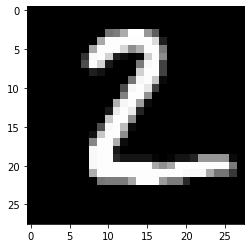

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)
pl.imshow(x,cmap='gray')

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))


In [13]:
network.compile(
    optimizer = 'adam', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

In [8]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/ 255

# 建模

In [9]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ACC 100% 在training set


In [17]:
network.fit(train_images,train_labels,epochs=16,batch_size=128,validation_split=0.2)

Epoch 1/16
375/375 [==============================] - 2s 5ms/step - loss: 3.2062e-05 - accuracy: 1.0000 - val_loss: 3.4336e-05 - val_accuracy: 1.0000
Epoch 2/16
375/375 [==============================] - 1s 2ms/step - loss: 2.8000e-05 - accuracy: 1.0000 - val_loss: 3.3820e-05 - val_accuracy: 1.0000
Epoch 3/16
375/375 [==============================] - 1s 2ms/step - loss: 2.4265e-05 - accuracy: 1.0000 - val_loss: 3.3106e-05 - val_accuracy: 1.0000
Epoch 4/16
375/375 [==============================] - 1s 2ms/step - loss: 2.1306e-05 - accuracy: 1.0000 - val_loss: 3.2804e-05 - val_accuracy: 1.0000
Epoch 5/16
375/375 [==============================] - 1s 2ms/step - loss: 1.8775e-05 - accuracy: 1.0000 - val_loss: 3.2762e-05 - val_accuracy: 1.0000
Epoch 6/16
375/375 [==============================] - 1s 2ms/step - loss: 1.6392e-05 - accuracy: 1.0000 - val_loss: 3.2576e-05 - val_accuracy: 1.0000
Epoch 7/16
375/375 [==============================] - 1s 2ms/step - loss: 1.4438e-05 - accuracy: 1.0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


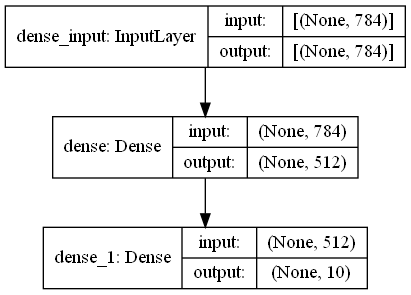

In [15]:
from tensorflow.keras.utils import plot_model
network.summary()

plot_model(network, 
    show_shapes= True,
)


# 在testing set有98.5% acc

In [18]:
test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9848
test_acc: 0.9847999811172485


# 接下來為筆記

## 張量的類別

In [25]:
import numpy as np

### 純量 (0D張量)
只包含一個數值的張量

In [26]:
x = np.array(12)
x

array(12)

In [27]:
x.ndim

0

### 向量 (1D張量) vector
由一組數值排列而成的陣列

In [28]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [29]:
x.ndim

1

### 矩陣 (2D張量)
一個矩陣

In [30]:
x = np.array([[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]])

In [31]:
x.ndim

2

### 高階張量 (3D張量與其上)
將多個矩陣包裝在一個新陣列中

In [32]:
x = np.array([[[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]],
        [[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]],
        [[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]]])

In [33]:
x.ndim

3

## 張量屬性
* 軸的數量(階數)：ndim
* 形狀：描述一個張量上每個軸有多少個維度
* 資料型別(dtype)：張量所存放的型別
 * float32
 * unit8
 * float64
 * char:Numpy中不存在字串張量

In [35]:
from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data() 

ndim屬性

In [36]:
print(train_images.ndim)

3


張量的形狀

In [37]:
print(train_images.shape)

(60000, 28, 28)


dtype(資料型別)

In [38]:
print(train_images.dtype)

uint8


train_images 是一個由8為元整數所組成的3D張量。  
由 60000個 28×28的矩陣組成  
每個矩陣是一個灰階圖像，像素值在0~255之間

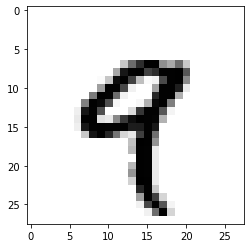

In [39]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## 張量切片 Tensor Slicing

In [40]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [41]:
my_slice = train_images[10:100, : , : ]
print(my_slice.shape)

(90, 28, 28)


In [42]:
my_slice = train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)


## 資料批次(batch)
深度學習模型不會一次學習整個模型，而是將資料分成一小批一小批來學習。  
這些批次向量被稱為批次軸或批次維度。

# 2-3 張量運算

## 元素間的運算
以relu運算為例

### 透過for迴圈運算

In [46]:
def naive_relu(x):
    assert len(x.shape) == 2 ," x 不是2D張量"

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape(1)):
            x[i,j] = max(x[i,j],0)

    return x

In [47]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape(1)):
            x[i,j] += y[i,j]

    return x

### 向量化執行 (vectorized implementations)

```python
import numpy as np

z = x + y
z = x * y
z = np.maximun(z,0.)
```



## 張量擴張(Broadcasting)
使較小的張量進行擴張以匹配形狀較大的張量

① 較小的向量會加入新的軸，以匹配較大的向量  
② 較小的向量會在這些新的軸重複寫入元素，以匹配較大張量的shape

### 透過for迴圈運算

In [48]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2 ," x 不是2D張量"
    assert len(y.shape) == 1 ," x 不是2D張量"
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape(1)):
            x[i,j] += y[j]

    return x

## 點積運算 (dot)

In [55]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x,shape[0]):
        z += x[i] * j[i]
    return z
# naive_vector_dot(t,t)

In [58]:
import numpy as np

def native_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(z.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
  
    return z

In [59]:
def native_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = native_vector_dot(x[i,:],y)
    return z

## 張量重塑 (reshaping)
調整各軸的元素數

In [60]:
x = np.array([[0.,1.],
        [2.,3.],
        [4.,5.]])

print(x.shape)

(3, 2)


In [61]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [62]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

### 矩陣轉置(transposition)
使x[i,:] 變成 [:,i]

In [63]:
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(20, 300)


# 2-4 以梯度為基礎的最佳化

```
output = relu(dot(W,input)+b)
```
權重(weights)/可訓練參數(trainable parameters):W、b → **屬性張量**  
* W ：內核(kernel)
* b ：偏值(bias)
  
**訓練循環**  
① 取出一批訓練樣本x和對應的目標y  
② 以x為輸入資料，開始執行神經網路(正向傳遞)已獲得預測值y_pred  
③ 計算神經網路的批次量損失值(y與y_pred間的差距)  
④ 更新神經網路的所有權重值，以稍微減少損失值  
  
![2-1](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/2-1.png?raw=true)

## [隨機梯度下降](https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter8.ipynb#scrollTo=8ftOmpRQ__rB&line=1&uniqifier=1)
1. 函數f(x)在x點的斜率就是該函數的導函數f'(x)

2. 函數f(W) 在W點的梯度就是該函數的張量導函數f'(W)   
  
![2-2](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/2-2.png?raw=true)

## 小批次隨機梯度下降(mini-batch stochastic gradient descent,mini-batch SGD)
① 取出一批次量的訓練樣本x和對應的目標y  
② 以x為輸入資料，開始執行神經網路(正向傳遞)已獲得預測值y_pred  
③ 計算神經網路的批次量損失值(y與y_pred間的差距)  
④ 計算損失值對神經網路權重的梯度(反向傳播)  
⑤ 將參數稍微往梯度的反方向移動，如 W -= step*gradient，降低一點批次的損失  

## 連串的導數：反向傳播 Backpropagation
自最終的損失值開始，從最後面層像前面反向運作  
透過連鎖法則(train rule)來計算每個神經網路參數
使用具符號微分(symbolic differentiation)運算能力的框架來建構神經網路